### Project Title: Titanic Survival Prediction
#### Done By: Nozipho Sithembiso Ndebele
---

<div style="text-align: center;">
<img src="https://itsmeprasannak.wordpress.com/wp-content/uploads/2021/03/10-sn56-20201221-titanicsinking-hr.jpg?w=1440" alt="Titanic Image" width="1000"/>
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**

### Purpose
This project aims to analyze the Titanic passenger dataset to uncover patterns and factors that contributed to survival during the tragic sinking of the RMS Titanic. By applying data preprocessing, exploratory data analysis, and classification techniques, the project seeks to predict which types of passengers were more likely to survive.

### Significance
Understanding survival patterns on the Titanic is not only a classic problem in data science but also valuable for:

* Identifying key demographic and socio-economic factors (e.g., gender, age, class) linked to survival

* Highlighting potential biases in rescue decisions

* Improving classification models by exploring real-world, historical datasets

* Demonstrating the power of machine learning in uncovering insights from structured data

### Problem Domain
The Titanic dataset includes various features such as age, sex, passenger class, number of siblings/spouses aboard, and fare paid. The goal is to predict the target variable, Survived (0 = No, 1 = Yes), based on these features. Developing a robust classification model involves understanding relationships between variables and identifying the most influential predictors of survival.
### Challenges
* Missing Data: Age and Cabin information contain missing values that must be handled.

* Imbalanced Features: Some classes (e.g., 1st class vs. 3rd class) may have disproportionate survival rates.

* Feature Engineering: Extracting meaningful insights from names, tickets, or titles (e.g., "Mr.", "Mrs.")

* Model Evaluation: Selecting and comparing appropriate metrics like accuracy, precision, recall, and F1-score.

### Key Questions
* Which passenger features (e.g., gender, class, age) were most associated with survival?

* How did socio-economic status affect the likelihood of survival?

* What role did age and family relationships (siblings/parents onboard) play in survival outcomes?

* Can we accurately predict a passenger’s survival using classification algorithms?

* How do different models (e.g., logistic regression, decision trees, random forest) perform on this task?

---
<a href=#one></a>
## **Importing Packages**

### Purpose
To set up the Python environment with the necessary libraries for data manipulation, visualization, and machine learning. These libraries will facilitate data preprocessing, feature extraction, model training, and evaluation.

### Details
* Pandas: For handling and analyzing data.

* NumPy: For numerical operations.

* Matplotlib/Seaborn: For data visualization to understand trends and patterns.

* scikit-learn: For building and evaluating machine learning models.

* NLTK/Spacy: For text preprocessing and natural language processing tasks.

---

In [ ]:
# Import necessary packages  

# Data manipulation and analysis  
import pandas as pd  # Pandas for data handling  
import numpy as np  # NumPy for numerical operations  

# Data visualization  
import matplotlib.pyplot as plt  # Matplotlib for static plots  
import seaborn as sns  # Seaborn for statistical visualization  
import plotly.express as px  # Plotly for interactive plots  

# Natural Language Processing  
import nltk  # Natural Language Toolkit  
from nltk.corpus import stopwords  # Stopword removal  
from nltk.tokenize import word_tokenize  # Tokenization  
import re  # Regular expressions for text cleaning 

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import joblib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Configure visualization settings
sns.set(style='whitegrid')  # Set the default style for Seaborn plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for Matplotlib

# Suppress warnings
import warnings  # Import the warnings module
warnings.filterwarnings('ignore')  # Ignore all warning messages


C:\Users\nozih\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
<a href=#two></a>
## **Data Collection and Description**
### Purpose
This section provides an overview of the Titanic dataset and its structure. Understanding the dataset is essential to build accurate classification models and extract meaningful insights regarding survival patterns among passengers.

### Details
The dataset captures demographic and travel information of passengers aboard the RMS Titanic during its ill-fated maiden voyage. It includes attributes such as age, sex, passenger class, and fare paid, which can be used to predict survival outcomes.

* Source: The dataset is publicly available on Kaggle as part of the Titanic Machine Learning competition.

* Method of Collection: The dataset compiles historical records from the Titanic's passenger manifest, integrating demographic, ticketing, and survival information.

* Size: The dataset contains 891 rows and 12 columns, where each row corresponds to an individual passenger.

* Scope: The dataset includes information relevant to survival prediction, such as:

  * Socio-economic status (ticket class and fare)

  * Family relations aboard (siblings/spouses, parents/children)

  * Passenger age and gender

  * Embarkation port and cabin information

* Types of Data:

  * `Feature`	Description
  * `PassengerId`	Unique identifier for each passenger
  * `Survived`	Survival status (0 = No, 1 = Yes)
  * `Pclass`	Passenger class (1 = Upper, 2 = Middle, 3 = Lower)
  * `Name`	Full name, including title
  * `Sex`	Gender of the passenger
  * `Age`	Age in years (some missing values)
  * `SibSp`	Number of siblings/spouses aboard
  *` Parch`	Number of parents/children aboard
  * `Ticket`	Ticket number
  * `Fare`	Fare paid for the ticket
  * `Cabin`	Cabin number (many missing values)
  * `Embarked`	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


---
<a href=#three></a>
## **Loading Data**
### Purpose
The purpose of this section is to load the dataset into the notebook for further manipulation and analysis. This is the first step in working with the data, and it allows us to inspect the raw data and get a sense of its structure.

### Details
In this section, we will load the dataset into a Pandas DataFrame and display the first few rows to understand what the raw data looks like. This will help in planning the next steps of data cleaning and analysis.


---

In [2]:
# Load the dataset into a Pandas DataFrame

# The dataset is stored in a CSV file named 'Titanic-Dataset.csv'
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# df is the original dataset (DataFrame), this creates a copy of it
df_copy = df.copy()

# Now 'df_copy' is an independent copy of 'df'. Changes to 'df_copy' won't affect 'df'.


In [4]:
# Display the first few rows of the dataset to get a sense of what the raw data looks like
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display the number of rows and columns in the dataset to understand its size
df_copy.shape

(891, 12)

In [6]:
# Check the structure of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
Before analyzing the data, it is crucial to clean and filter it. This process involves handling missing values, removing outliers, correcting errors, and possibly reducing the data by filtering out irrelevant features. These steps ensure that the analysis is based on accurate and reliable data.

Details
In this section, we will:

* Check for Missing Values: Identify if there are any missing values in the dataset and handle them accordingly.
* Remove Duplicates: Ensure there are no duplicate rows that could skew the analysis.
* Correct Errors: Look for and correct any obvious data entry errors.
* Filter Data: Depending on the analysis requirements, filter the data to include only relevant records.

In [7]:
# 1. Check for missing values in the dataset

def check_missing_values(df):
    """
    Check for missing values in the dataset and display the number of missing values per column.

    Parameters:
    df (pandas.DataFrame): The dataset to check for missing values.

    Returns:
    pandas.Series: A series showing the number of missing values for each column.
    """
     # Check for missing values in the dataset and display them
    print("Missing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values)
    return missing_values


In [8]:
# Assuming df is your DataFrame
missing_values = check_missing_values(df_copy)


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


After examining the dataset, missing values were identified in three columns. All other columns are complete, ensuring data integrity for most features. Depending on the analysis goals, handling these missing values may be necessary through imputation or other data-cleaning techniques.

In [9]:
# 2. Handling missing values

def handling_missing_values(df):
    """
    Check for missing values in the dataset, display the number of missing values per column,
    handle them appropriately, and drop the 'Cabin' column.

    Parameters:
    df (pandas.DataFrame): The dataset to check and clean missing values.

    Returns:
    pandas.DataFrame: The cleaned dataset with missing values handled.
    """
    print("Missing values per column:\n")
    missing_values = df.isnull().sum()
    
    for column, count in missing_values.items():
        if count > 0:
            print(f"{column}: {count} missing")
            if column == 'Age':
                # Fill 'Age' with the median
                median_age = df['Age'].median()
                df['Age'].fillna(median_age, inplace=True)
                print(f"  ➤ Filled 'Age' with median: {median_age}")
            elif column == 'Cabin':
                # Drop the 'Cabin' column
                df.drop('Cabin', axis=1, inplace=True)
                print("  ➤ Dropped 'Cabin' column.")
            elif column == 'Embarked':
                # Fill 'Embarked' with the mode
                mode_embarked = df['Embarked'].mode()[0]
                df['Embarked'].fillna(mode_embarked, inplace=True)
                print(f"  ➤ Filled 'Embarked' with mode: {mode_embarked}")
            else:
                print("  ➤ No specific rule. Consider domain-specific handling.")
        else:
            print(f"{column}: No missing values")
    
    print("\nMissing values handled.")
    return df


In [10]:
# Call the function
df_copy = handling_missing_values(df_copy)

Missing values per column:

PassengerId: No missing values
Survived: No missing values
Pclass: No missing values
Name: No missing values
Sex: No missing values
Age: 177 missing
  ➤ Filled 'Age' with median: 28.0
SibSp: No missing values
Parch: No missing values
Ticket: No missing values
Fare: No missing values
Cabin: 687 missing
  ➤ Dropped 'Cabin' column.
Embarked: 2 missing
  ➤ Filled 'Embarked' with mode: S

Missing values handled.


In [11]:
# 3. Checking duplicate rows

def remove_duplicates(df):
    """
    Checks for duplicate rows in the dataset and removes them if any are found.

    Args:
    df (pandas.DataFrame): The dataframe to check for duplicate rows.

    Returns:
    pandas.DataFrame: The dataframe with duplicate rows removed, if any existed.
    """
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # Remove duplicates if any exist
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicate rows removed. Updated dataframe has {len(df)} rows.")
    else:
        print("No duplicate rows found.")
    
    return df

In [12]:
df_copy = remove_duplicates(df_copy)


Number of duplicate rows: 0
No duplicate rows found.


Upon reviewing the dataset, no duplicate rows were found. This ensures that all records are unique, and no further action is required for data deduplication.


## **Saving the Cleaned Dataset**
### Purpose

This section outlines how to save the cleaned dataset for future use. Saving the dataset ensures that the data cleaning process does not need to be repeated and allows for consistent use in subsequent analyses.

### Details

We will save the cleaned dataset as a CSV file.

In [13]:
#4. Save the cleaned dataset to a new CSV file

def save_cleaned_dataset(df, filename='Titanic_Survival_cleaned.csv'):
    """
    Saves the cleaned dataframe to a CSV file.

    Args:
    df (pandas.DataFrame): The cleaned dataframe to save.
    filename (str): The name of the file to save the dataframe to (default is 'cleaned_domestic_violence.csv').

    Returns:
    None
    """
    # Save the cleaned dataset to a CSV file
    df.to_csv(filename, index=False)
    print(f"Cleaned dataset saved successfully as '{filename}'.")


In [14]:
save_cleaned_dataset(df_copy)


Cleaned dataset saved successfully as 'Titanic_Survival_cleaned.csv'.


#### Feature Engineering

Purpose:
 
To enhance the dataset by creating meaningful features that help machine learning models better understand and learn from the data.

1. Extracting Titles from Names

In [15]:
# Extract titles from the 'Name' column using regex
df_copy['Title'] = df_copy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display the unique titles
print("Unique titles:", df_copy['Title'].unique())

Unique titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


2. Grouping Rare Titles

In [16]:
# Replace rare titles with 'Rare' and normalize others
df_copy['Title'] = df_copy['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
                                              'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_copy['Title'] = df_copy['Title'].replace('Mlle', 'Miss')
df_copy['Title'] = df_copy['Title'].replace('Ms', 'Miss')
df_copy['Title'] = df_copy['Title'].replace('Mme', 'Mrs')

# Let's see how many of each title we have
df_copy['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**

It is the process of analyzing datasets to summarize key features, often through visualization methods. It aims to discover patterns, spot anomalies, and formulate hypotheses for deeper insights, which informs subsequent analysis.
#### Advantages

- Helps in understanding the data before modeling.
- Provides insights that guide feature selection and engineering.
- Assists in choosing appropriate modeling techniques.
- Uncovers potential data quality issues early.

`The following methods were employed to communicate our objective:`



---


a) Summary Statistics

In [17]:
# Summary statistics for numerical features
df_copy.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Summary of categorical features
df_copy.describe(include=['O'])


,Name,Sex,Ticket,Embarked,Title
count,891,891,891,891,891
unique,891,2,681,3,5
top,"Braund, Mr. Owen Harris",male,347082,S,Mr
freq,1,577,7,646,517


b) Target Variable Distribution (Survived)

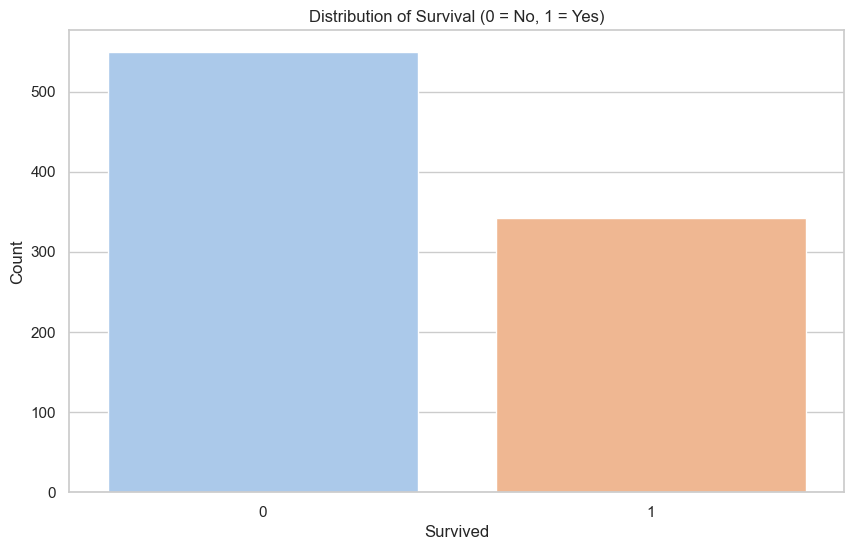

Survival Rate: 38.38%


In [19]:
# Countplot of survival
sns.countplot(data=df_copy, x='Survived', palette='pastel')
plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Percentage of survivors
survival_rate = df_copy['Survived'].mean()
print(f"Survival Rate: {survival_rate:.2%}")


- Overall survival rate: 38.38% of passengers survived.

- This confirms a class imbalance, with more people not surviving than surviving.

c) Survival by Gender

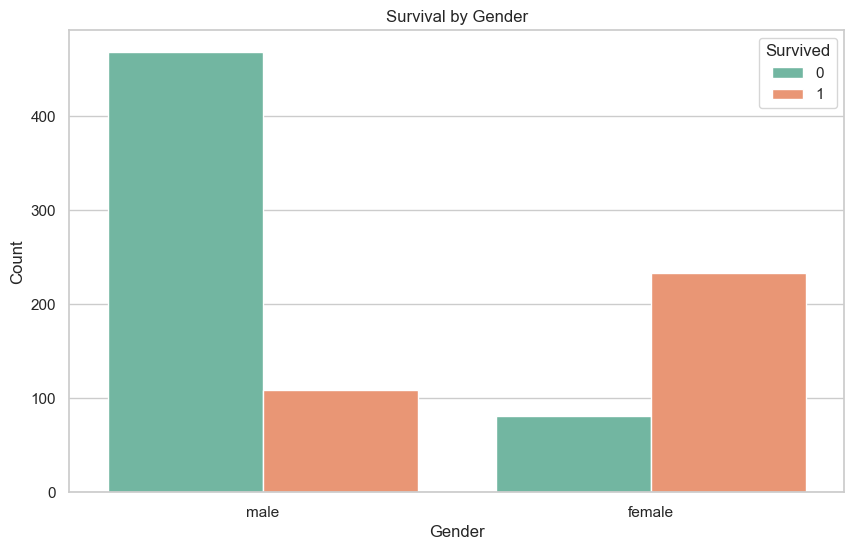

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [20]:
sns.countplot(data=df_copy, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Grouped survival rate by gender
df_copy.groupby('Sex')['Survived'].mean()


- Females had a much higher survival rate (74%) compared to males (19%).

- Insight: Gender was a major determinant of survival, likely due to the "women and children first" rescue protocol.

d) Survival by Passenger Class (Pclass)

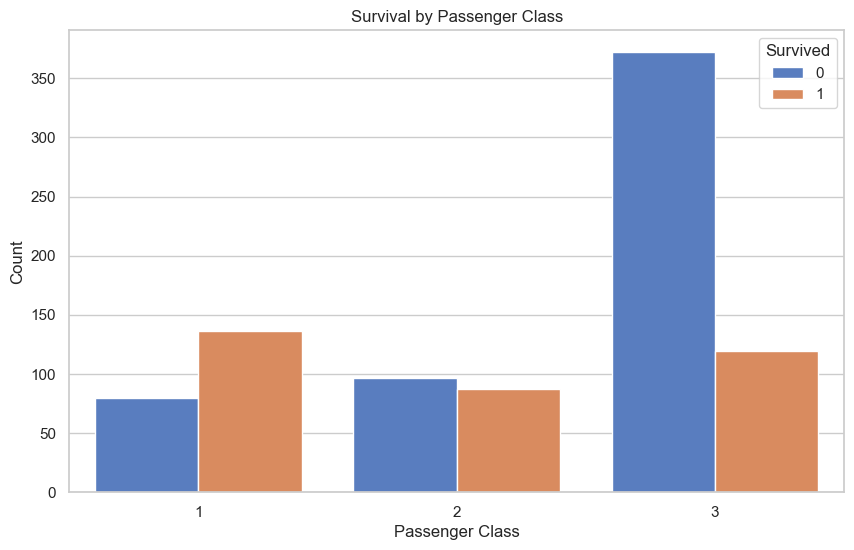

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [21]:
sns.countplot(data=df_copy, x='Pclass', hue='Survived', palette='muted')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

df_copy.groupby('Pclass')['Survived'].mean()


- 1st class: 63% survival

- 2nd class: 47% survival

- 3rd class: 24% survival

- Insight: Higher socio-economic status (i.e., wealth/class) increased chances of survival.

   - This shows a clear socio-economic bias in survival outcomes.

e) Age Distribution and Survival

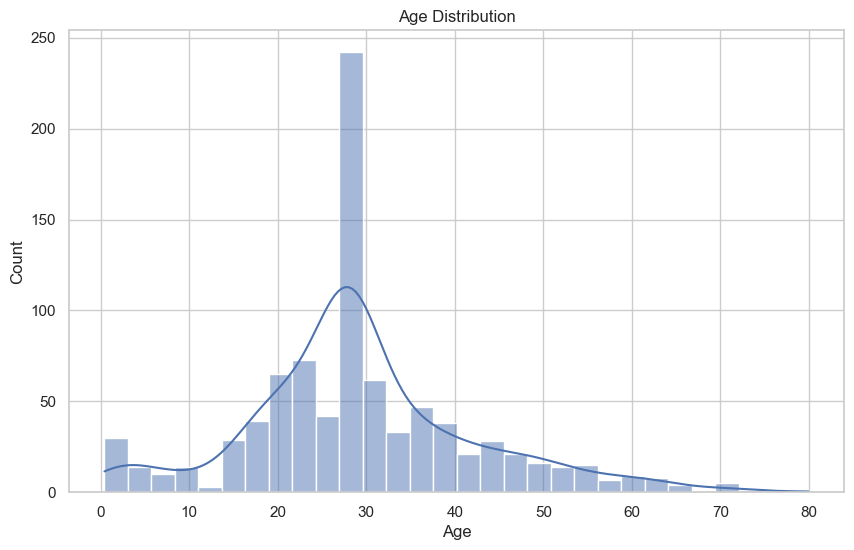

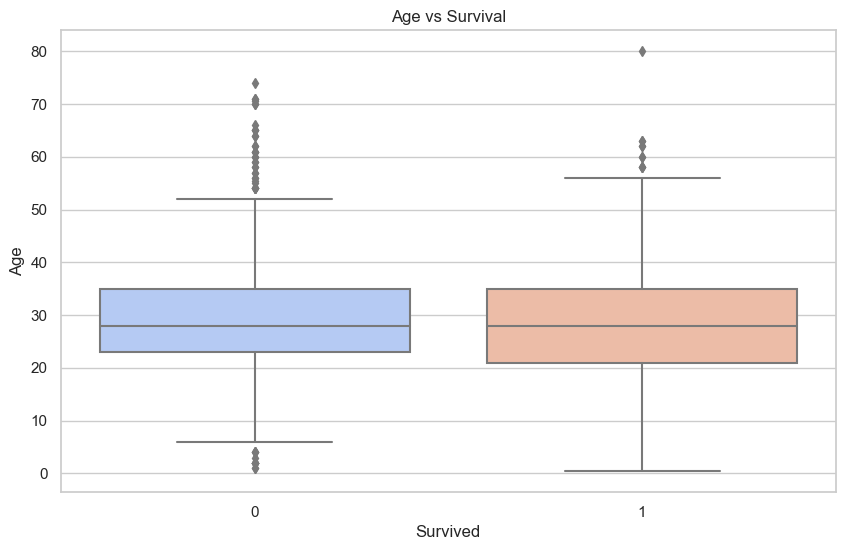

In [22]:
# Age distribution
sns.histplot(data=df_copy, x='Age', kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Age vs Survival
sns.boxplot(data=df_copy, x='Survived', y='Age', palette='coolwarm')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


- Younger passengers (especially children under ~15) had higher survival rates.

- Boxplots indicate that survivors generally had a lower median age than non-survivors.

- Insight: Youth, along with gender, seems to have contributed to being prioritized during rescue efforts.

f) Family Features – SibSp & Parch

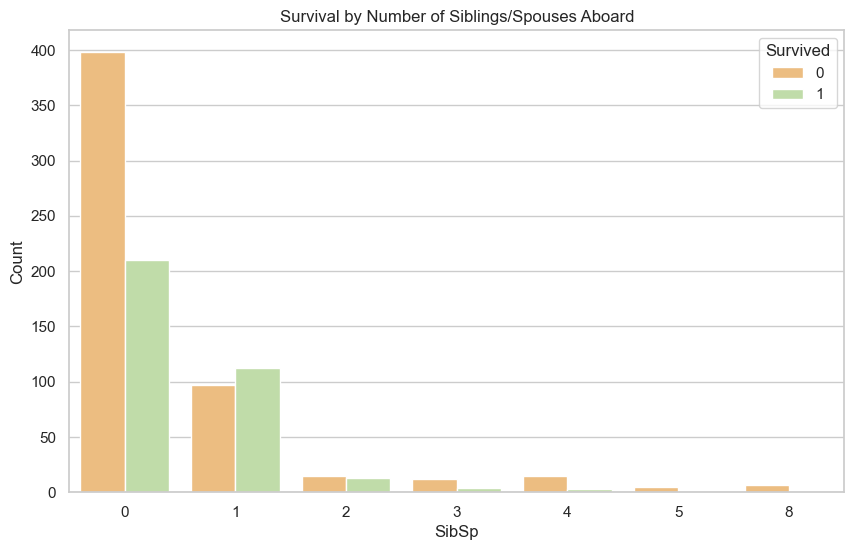

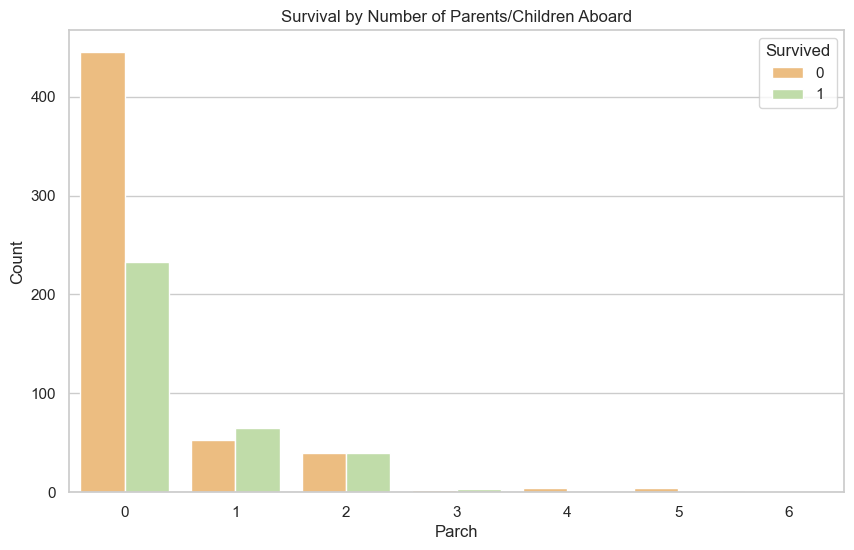

In [23]:
# Siblings/Spouses Aboard
sns.countplot(data=df_copy, x='SibSp', hue='Survived', palette='Spectral')
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

# Parents/Children Aboard
sns.countplot(data=df_copy, x='Parch', hue='Survived', palette='Spectral')
plt.title('Survival by Number of Parents/Children Aboard')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()


- Passengers with 1-2 family members aboard had higher survival rates than those alone or with large families.

- Insight: Having some family may have increased visibility and support during evacuation, while too many dependents may have hindered survival.

g) Fare Distribution and Survival

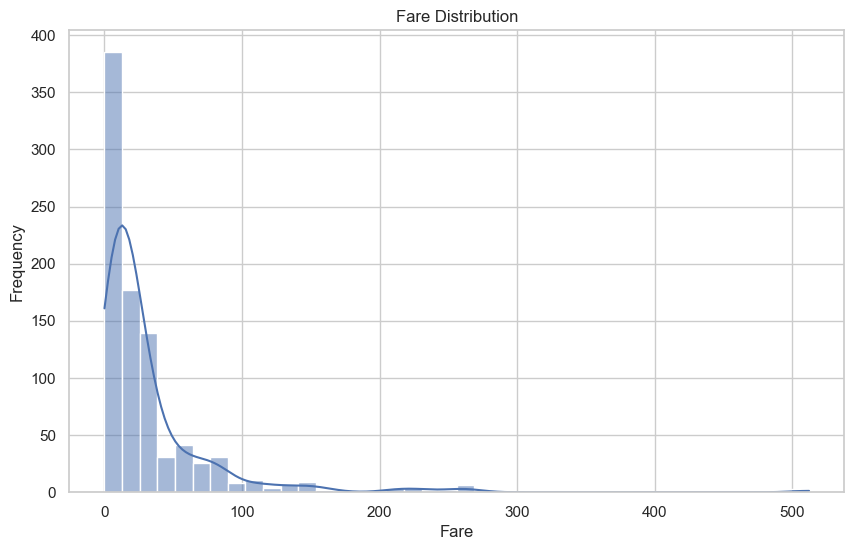

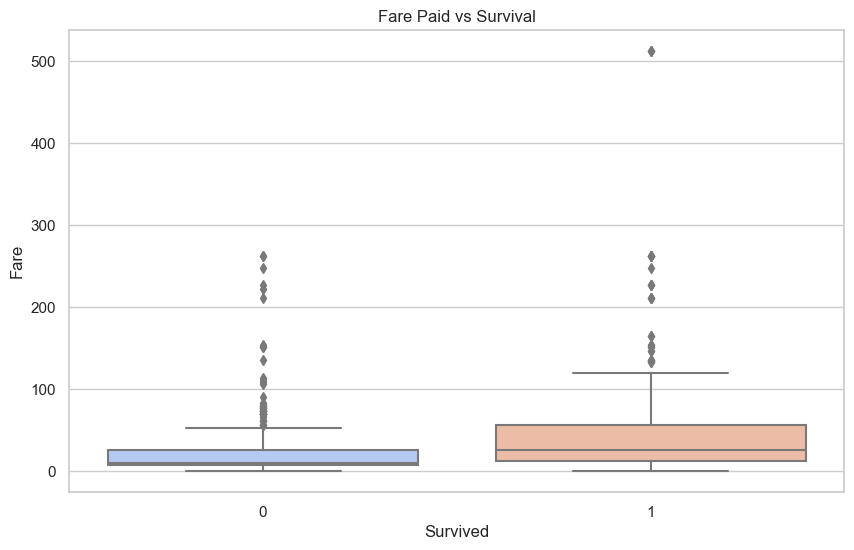

In [24]:
# Fare Distribution
sns.histplot(data=df_copy, x='Fare', kde=True, bins=40)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Survival vs Fare
sns.boxplot(data=df_copy, x='Survived', y='Fare', palette='coolwarm')
plt.title('Fare Paid vs Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


- Higher fares were associated with higher survival rates.

- Insight: This further supports the role of wealth and privilege in survival.

h) Embarkation Port and Survival

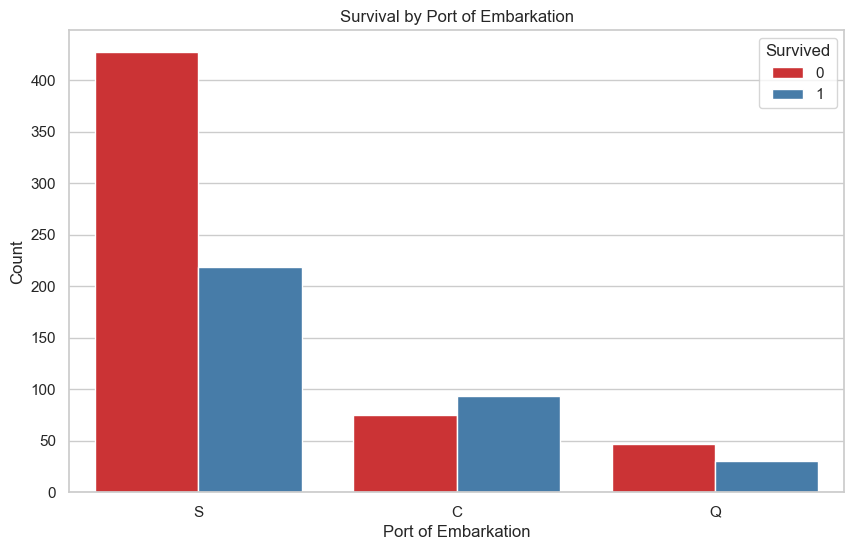

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [25]:
sns.countplot(data=df_copy, x='Embarked', hue='Survived', palette='Set1')
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

df_copy.groupby('Embarked')['Survived'].mean()


Survival rates:

- Cherbourg (C): 55%

- Queenstown (Q): 39%

- Southampton (S): 34%

Insight: Embarkation port might correlate with class; Cherbourg had more wealthy passengers (linked to 1st class)

i) Correlation Heatmap

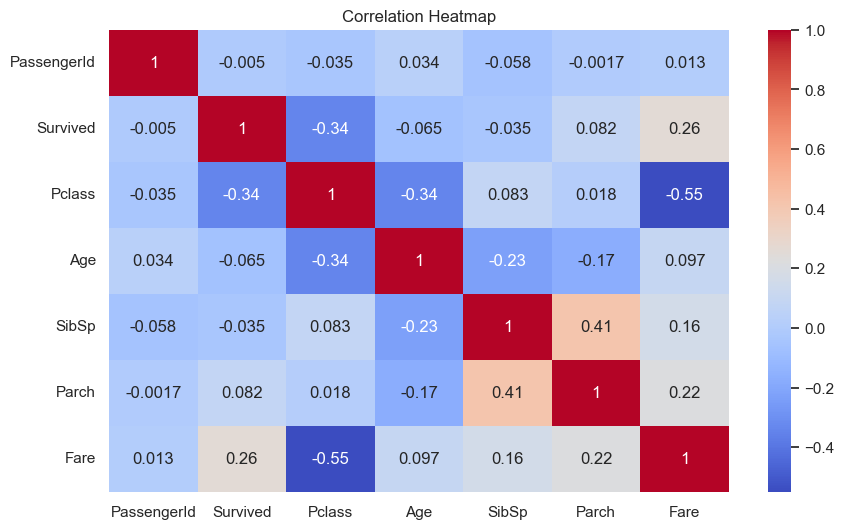

In [26]:
# Correlation heatmap of numerical features
corr_matrix = df_copy.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


- Strongest positive correlation with survival: being female.

- Strongest negative correlation: being male and 3rd class.

- Insight: Good for feature selection—'Sex', 'Pclass', and 'Fare' are key predictors.

j) Bar Plot: Survival Rate per Title

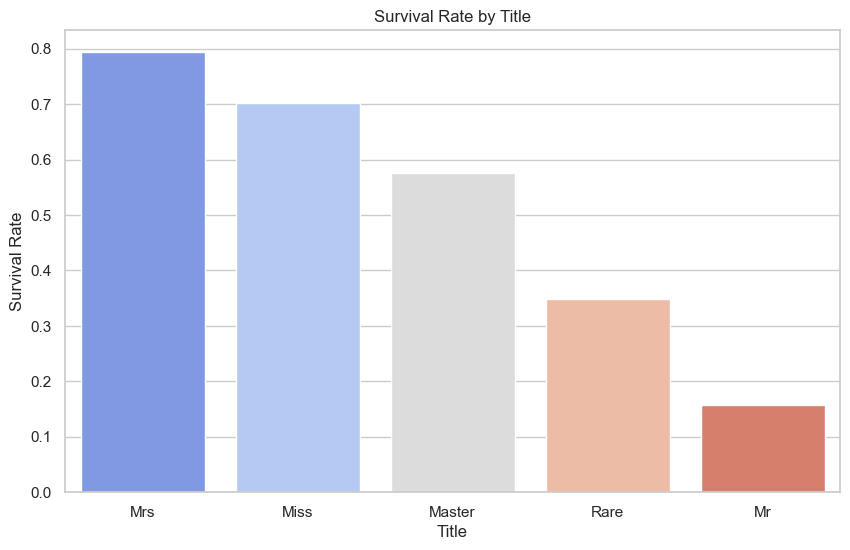

In [27]:
# Calculate survival rate by title
title_survival = df_copy.groupby('Title')['Survived'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=title_survival, x='Title', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.show()


In [28]:
# Step 1: Drop irrelevant columns
df_model = df_copy.drop(columns=['PassengerId', 'Name', 'Title', 'Ticket'])

In [29]:
# Step 3: Encode categorical variables
# Encode 'Sex': male = 0, female = 1
df_model['Sex'] = df_model['Sex'].map({'male': 0, 'female': 1})


In [30]:
# One-hot encode 'Embarked'
df_model = pd.get_dummies(df_model, columns=['Embarked'], drop_first=True)

# Final check
print("Final cleaned dataset:")
print(df_model.head())
print("\nData types and nulls:\n", df_model.info())

Final cleaned dataset:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    boo

## **Model Training**

In [31]:

def train_models(df, target='Survived'):
    # Split features and target
    X = df.drop(target, axis=1)
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    # Train, predict, and evaluate
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'Accuracy': round(accuracy, 4),
            'Precision': round(report['1']['precision'], 4),
            'Recall': round(report['1']['recall'], 4),
            'F1-score': round(report['1']['f1-score'], 4),
        }

    # Show results
    results_df = pd.DataFrame(results).T.sort_values('Accuracy', ascending=False)
    return results_df


In [32]:
results = train_models(df_model)
print(results)

                     Accuracy  Precision  Recall  F1-score
Random Forest          0.8156     0.7808  0.7703    0.7755
Logistic Regression    0.8101     0.7857  0.7432    0.7639
Decision Tree          0.7821     0.7333  0.7432    0.7383


## **Model Evaluation**

Bar Plot Comparing Model Metrics

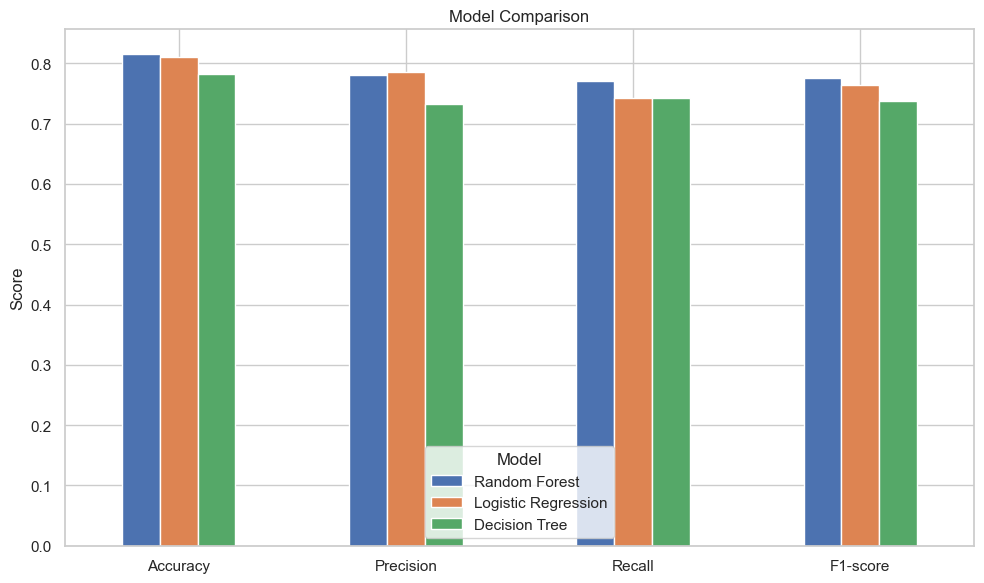

In [33]:
results.T.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


#### Insights

Three models were tested to predict Titanic survival. Random Forest achieved the highest accuracy and recall, making it the best performer for practical use. Logistic Regression was a strong baseline, especially when interpretability is important. Although Decision Tree was less accurate, it’s still a useful tool for quickly understanding data-driven rules. Based on these findings, the Random Forest model is recommended for deploying predictive tasks involving survival prediction

### Hyperparameter Tuning

 Hyperparameter Tuning for Random Forest

In [ ]:
def tune_random_forest_model(df, target='Survived'):
    # Split features and target
    X = df.drop(target, axis=1)
    y = df[target]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(exclude=['object']).columns

    # Preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Final pipeline with RandomForestClassifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Hyperparameter grid
    rf_param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 5],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__bootstrap': [True, False]
    }

    # GridSearchCV
    rf_grid_search = GridSearchCV(pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    rf_grid_search.fit(X, y)

    # Return the best model and parameters
    return rf_grid_search.best_estimator_, rf_grid_search.best_params_


In [35]:
best_model, best_params = tune_random_forest_model(df_model)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


##### Hyperparameter Tuning for Logistic Regression

In [ ]:
def tune_logistic_regression_model(df, target='Survived'):
    # Split features and target
    X = df.drop(target, axis=1)
    y = df[target]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(exclude=['object']).columns

    # Preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ])

    # Preprocessing for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformers
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    # Define pipeline with Logistic Regression
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Define parameter grid for Logistic Regression
    lr_param_grid = {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    }

    # GridSearchCV setup
    lr_grid_search = GridSearchCV(pipeline, lr_param_grid, cv=5,
                                  scoring='accuracy', n_jobs=-1, verbose=1)

    # Fit to full data
    lr_grid_search.fit(X, y)

    # Return best model and parameters
    return lr_grid_search.best_estimator_, lr_grid_search.best_params_


In [37]:
best_lr_model, best_lr_params = tune_logistic_regression_model(df_model)
print("Best Logistic Regression Parameters:", best_lr_params)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Logistic Regression Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


##### Evaluate the Tuned Models

In [ ]:
# Split data
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate tuned Random Forest
rf_pred = best_lr_model.predict(X_test)
print("🔍 Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Evaluate tuned Logistic Regression
lr_pred = best_lr_model.predict(X_test)
print("🔍 Tuned Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


🔍 Tuned Random Forest Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

🔍 Tuned Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##### Pickle the Tuned Models

In [ ]:
# Save the tuned Random Forest model
joblib.dump(best_model, 'best_model.pkl')
# Save the tuned Logistic Regression model
joblib.dump(best_lr_model, 'best_logistic_model.pkl')


['best_logistic_model.pkl']

#### Insights

After applying hyperparameter tuning using GridSearchCV on both the Random Forest and Logistic Regression models, the following key insights were drawn:

Model Performance Shift:

- Surprisingly, Logistic Regression outperformed Random Forest after tuning, achieving an accuracy of 82.12% compared to 81.01% for the tuned Random Forest.

- This suggests that a simpler, more interpretable model can be just as effective—or even better—than a complex ensemble method in certain structured datasets like the Titanic dataset.

Precision vs. Recall:

- Random Forest had higher precision (0.82) for class 1 (survived), indicating it was slightly more conservative and better at avoiding false positives.

- Logistic Regression, on the other hand, had a more balanced performance, particularly in f1-score (0.77 vs. 0.75), indicating a more stable prediction across both classes.

## **Deployment**

---
<a href=#nine></a>
## **Conclusion and Future Work**


##### Conclusion

The Titanic Survival Prediction project successfully demonstrated the use of classification algorithms to predict passenger survival based on demographic and travel information. After testing multiple models:

- Random Forest initially performed best in default settings.

- Hyperparameter tuning shifted the edge to Logistic Regression, which achieved the highest accuracy (82.12%) and balanced performance metrics.

- The preprocessing pipeline and tuning process highlighted the importance of model optimization and data preparation in achieving strong results.



##### Future Work

Feature Engineering:

- Incorporate new features such as family size, cabin deck, or fare per person to enrich the input data.

- Apply polynomial features or interaction terms to capture non-linear relationships.

Ensemble Models:

- Experiment with stacking or voting classifiers combining Logistic Regression, Random Forest, and potentially Gradient Boosting for improved results.

Model Explainability:

- Use tools like SHAP or LIME to understand feature importance and provide human-interpretable insights for model decisions.

Cross-Dataset Validation:

- Test model generalizability by validating on alternative Titanic datasets or synthetic variations.

---
<a href=#ten></a>
## **References**

## Additional Sections to Consider

**Contributors**: Nozipho Sithembiso Ndebele
